In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("../../../DATA/Kaggle/titanic/train.csv")
test_df =  pd.read_csv("../../../DATA/Kaggle/titanic/test.csv")
ss =  pd.read_csv("../../../DATA/Kaggle/titanic/gender_submission.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Remove duplicates

In [6]:
print(f'\nbefore removing duplicates training data contains {train_df.shape[0]} records and {train_df.shape[1]} columns' )

train_df=train_df.drop_duplicates()
print(f'\nafter removing  duplicates training data contains {train_df.shape[0]} records and {train_df.shape[1]} columns' )



before removing duplicates training data contains 891 records and 12 columns

after removing  duplicates training data contains 891 records and 12 columns


In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
ID_Col,Target_Col = 'PassengerId', 'Survived'

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Davies, Mr. Charles Henry",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [12]:
train_df[Target_Col].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:>

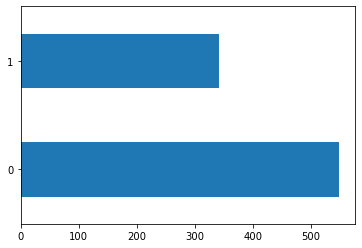

In [13]:
train_df[Target_Col].value_counts().plot(kind='barh')

In [14]:
train_df[Target_Col].isnull().sum()

0

In [15]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [20]:
Cat_Cols= ['Pclass', 'Sex','SibSp',
       'Parch','Embarked']

Num_Cols = ['Age','Fare']

Value_Cols = [c for c in train_df.columns if (c not in [Target_Col,ID_Col] and c not in Cat_Cols and c not in Num_Cols)]



In [21]:
print("ID:",ID_Col)
print("\nTarget:",Target_Col)
print("\nCategorical:",Cat_Cols)
print("\nNumerical:",Num_Cols)
print("\nValue:",Value_Cols)

ID: PassengerId

Target: Survived

Categorical: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

Numerical: ['Age', 'Fare']

Value: ['Name', 'Ticket', 'Cabin']


### Categorical Columns

In [22]:
train_df[Cat_Cols].isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [23]:
Embarked_mode=train_df['Embarked'].mode()

In [24]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
train_df['Embarked']= train_df['Embarked'].fillna(Embarked_mode[0])

In [26]:
train_df[Cat_Cols].isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

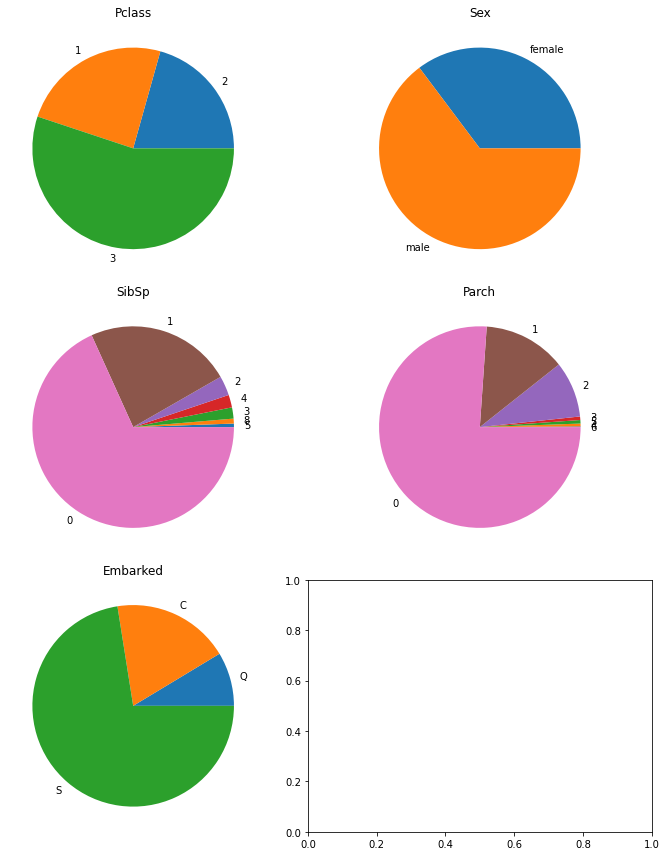

In [27]:
fig,axes = plt.subplots(3,2,figsize=(10,12))
axis = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train_df[Cat_Cols]):
    train_df[c].value_counts()[::-1].plot(kind='pie',ax = axis[i],title=c,fontsize=10)
    axis[i].set_ylabel('')
plt.tight_layout()

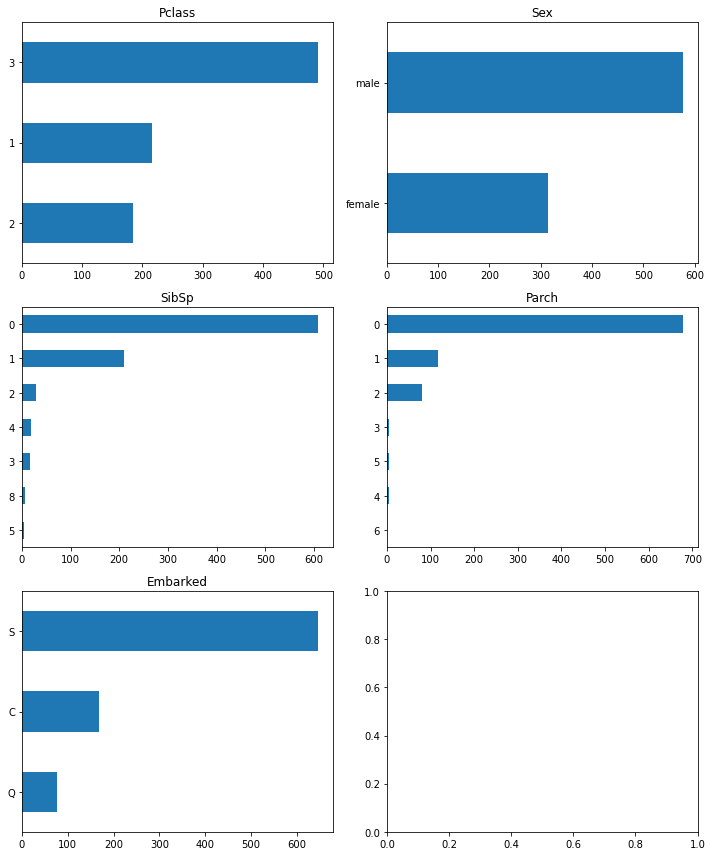

In [28]:
fig,axes = plt.subplots(3,2,figsize=(10,12))
axis = [ax for ax_row in axes for ax in ax_row]

for i,c in enumerate(train_df[Cat_Cols]):
    train_df[c].value_counts()[::-1].plot(kind='barh',ax = axis[i],title=c,fontsize=10)
    axis[i].set_ylabel('')
plt.tight_layout()

### Numerical Columns

In [29]:
Num_Cols

['Age', 'Fare']

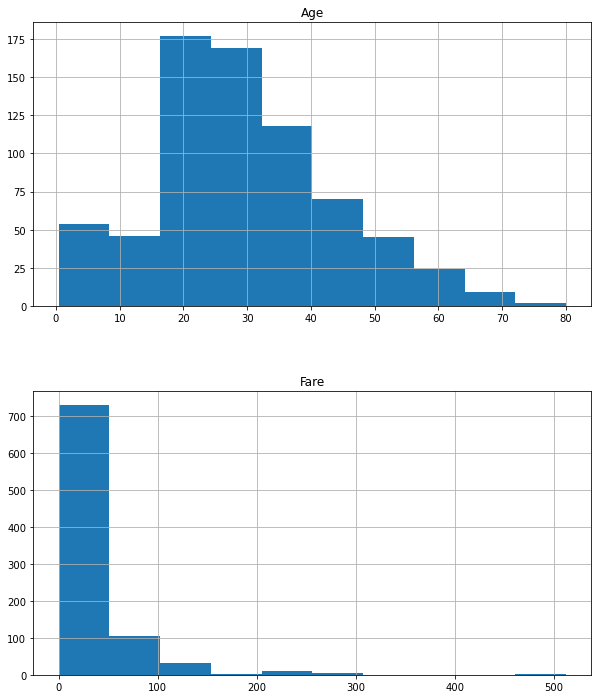

In [30]:
fig,axes = plt.subplots(2,1,figsize=(10,12))
for i,c in enumerate(Num_Cols):
    train_df[[c]].hist(ax=axes[i])

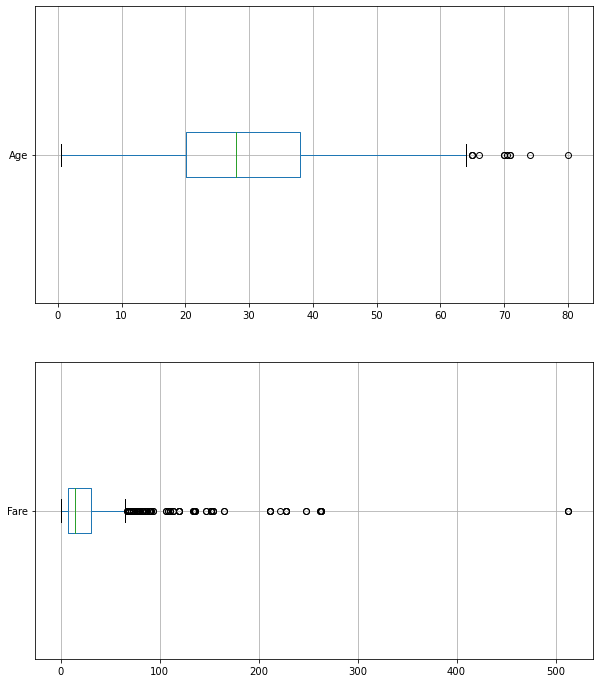

In [37]:
fig,axes = plt.subplots(2,1,figsize=(10,12))
for i,c in enumerate(Num_Cols):
    train_df[[c]].boxplot(ax=axes[i],vert=False)

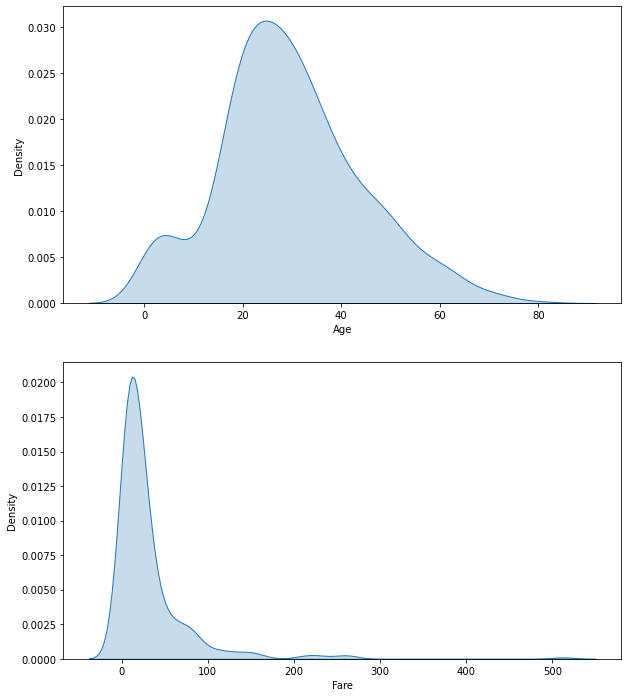

In [36]:
fig,axes = plt.subplots(2,1,figsize=(10,12))
for i,c in enumerate(Num_Cols):
    sns.kdeplot(data=train_df, ax=axes[i], x=c,fill=True)

### Bivariate Analysis

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Bar Plot, Box Plot
* Categorical Vs Categorical---- Bar Plot

## Statistical measurement of relationship between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In [43]:
groupdata = train_df.groupby([Target_Col])

In [44]:
groupdata.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


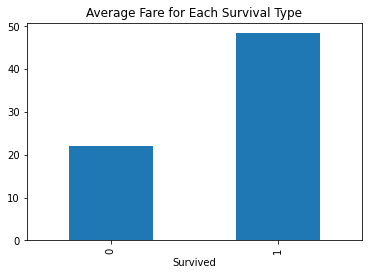

In [50]:
groupdata.mean()['Fare'].plot(kind='bar', title='Average Fare for Each Survival Type');

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

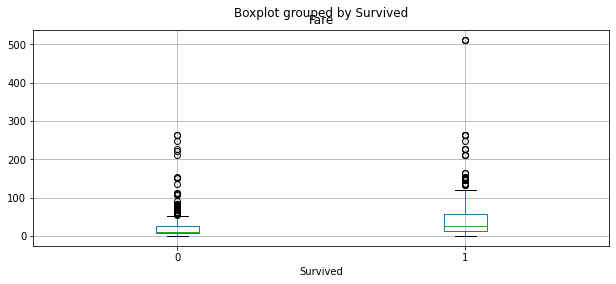

In [52]:
train_df.boxplot(column='Fare', by='Survived', figsize=(10,4), vert=True)

### outlier Treatment

In [54]:
train_df[train_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

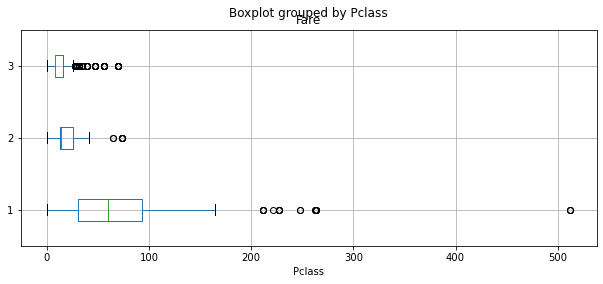

In [55]:
train_df.boxplot(column='Fare', by='Pclass', figsize=(10,4), vert=False)

In [57]:
train_df[train_df['Fare']>260].sort_values(by='Fare',ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [60]:
train_df['Fare'][train_df['Fare']>300]=263

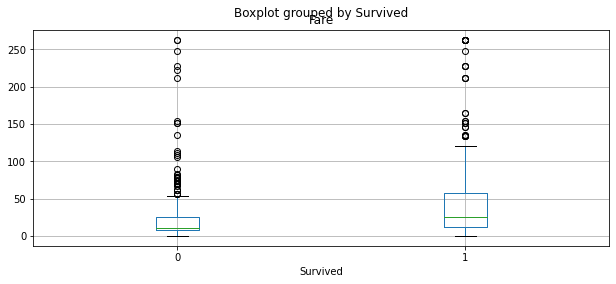

In [62]:
train_df.boxplot(column='Fare', by='Survived', figsize=(10,4), vert=True);

In [63]:
from scipy.stats import f_oneway

In [ ]:
train_df.group

In [66]:
FareLists=groupdata['Fare'].apply(list)
AnovaResults = f_oneway(*FareLists)
print('P-Value for Anova for Fare is: ', AnovaResults[1])

P-Value for Anova for Fare is:  1.8421954983111479e-16


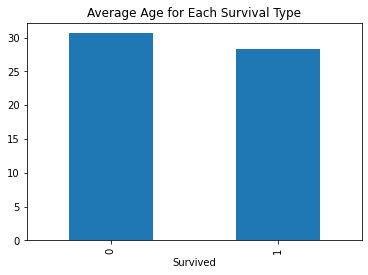

In [49]:
groupdata.mean()['Age'].plot(kind='bar', title='Average Age for Each Survival Type');